In [13]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

In [14]:
X = pd.read_csv('16_x.csv', header=None)
Y = pd.read_csv('16_y.csv', header=None)
X, Y

(            0         1         2         3         4         5         6
 0    1.085972  0.042964 -0.811609  0.900376  1.375709 -0.123295  0.839087
 1   -0.866130 -0.488092 -0.340516 -0.358184  0.437640 -0.332806 -1.089644
 2    1.025258  0.097799 -0.591573 -0.480123  0.071805  0.458291 -1.221921
 3    1.686314  1.588518  0.358079 -0.500850  0.194109 -1.001953 -1.392048
 4   -2.605037 -0.832927 -0.181908 -0.698073 -1.193525  0.519652 -1.763429
 ..        ...       ...       ...       ...       ...       ...       ...
 417 -0.642813 -1.267049 -1.344334 -0.839594 -1.047402 -0.967330 -0.108983
 418 -0.455020  0.513675  0.930635  1.613565  0.952639  0.631247  0.222298
 419 -0.253452  0.841788 -0.526650  0.569714 -0.733700  1.777961  0.109787
 420 -0.449373 -1.140431  0.550986  1.795356  1.935450  0.758041  0.566759
 421  0.658662 -0.234914 -0.505902  0.358196 -1.119869 -0.451086 -0.627339
 
 [422 rows x 7 columns],              0
 0    -8.667958
 1   -10.513161
 2    -1.559238
 3    13.3

Сделайте количественное описание датасета: количество точек данных, признаков, статистику по каждому признаку.

In [15]:
X.shape[0], Y.shape[0]

(422, 422)

In [16]:
X.shape[1], Y.shape[1]

(7, 1)

In [17]:
X.describe()

,0,1,2,3,4,5,6
count,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000,422.000000
mean,-0.010568,0.001806,-0.051164,-0.079169,0.029384,0.117229,-0.004447
std,0.964555,1.023113,1.017752,1.029667,0.971196,1.033546,1.010192
min,-2.943265,-2.596237,-2.879111,-3.373978,-2.616850,-3.015102,-4.405918
25%,-0.684818,-0.684489,-0.787185,-0.835759,-0.685562,-0.627616,-0.635520
50%,0.025158,-0.088501,-0.058626,-0.040899,0.014255,0.084407,0.029722
75%,0.651867,0.651310,0.540846,0.626833,0.675389,0.846601,0.568375
max,2.323106,3.238409,3.149600,2.787633,3.018174,2.628534,3.262178


Разделите все наблюдения на обучающую и тестовую выборки в соотношении 80-20.


In [18]:
x_train, x_test, y_train, y_test = train_test_split(
    X,
    Y,
    test_size=0.2,
    train_size=0.8,
)

results = x_train, x_test, y_train, y_test
results

for el in results:
    el.sort_index(inplace=True)
x_train, x_test, y_train, y_test

(            0         1         2         3         4         5         6
 0    1.085972  0.042964 -0.811609  0.900376  1.375709 -0.123295  0.839087
 2    1.025258  0.097799 -0.591573 -0.480123  0.071805  0.458291 -1.221921
 4   -2.605037 -0.832927 -0.181908 -0.698073 -1.193525  0.519652 -1.763429
 5    0.840184  0.084366  0.548378 -1.453042 -0.364732  0.149308 -0.477922
 7   -1.060061 -0.152497 -1.417685  0.316726  0.251751 -0.732007 -1.271781
 ..        ...       ...       ...       ...       ...       ...       ...
 416 -1.349915  0.397257  1.864486  0.213704 -0.685433  0.101118  0.656059
 417 -0.642813 -1.267049 -1.344334 -0.839594 -1.047402 -0.967330 -0.108983
 418 -0.455020  0.513675  0.930635  1.613565  0.952639  0.631247  0.222298
 420 -0.449373 -1.140431  0.550986  1.795356  1.935450  0.758041  0.566759
 421  0.658662 -0.234914 -0.505902  0.358196 -1.119869 -0.451086 -0.627339
 
 [337 rows x 7 columns],
             0         1         2         3         4         5         

Для целевой и каждого из признаков постройте парную регрессионную модель. Визуализируйте линию регрессии и исходные данные на графике. При помощи коэффициентов оцените силу связи.

In [19]:
def draw_dual_model(x_train, y_train, x_test, y_test):
    x_train=x_train.to_frame()
    x_test=x_test.to_frame()
    reg = linear_model.LinearRegression()
    reg.fit(x_train, y_train)
    y_pred = reg.predict(x_test)
    print(f"Коэффициенты регрессии: {reg.coef_}")
    print(f"Среднеквадратичная ошибка: {mean_squared_error(y_test, y_pred)}")
    print(f"Коэффициент детерминации: {r2_score(y_test, y_pred)}")

    plt.figure(figsize=(12, 9))
    plt.scatter(x_train, y_train, color="black")
    plt.plot(x_test.iloc[:,0], y_pred, color="red", linewidth=3)
    plt.show()

Коэффициенты регрессии: [[0.14509942]]
Среднеквадратичная ошибка: 127.88565483287296
Коэффициент детерминации: -0.009909027071981491


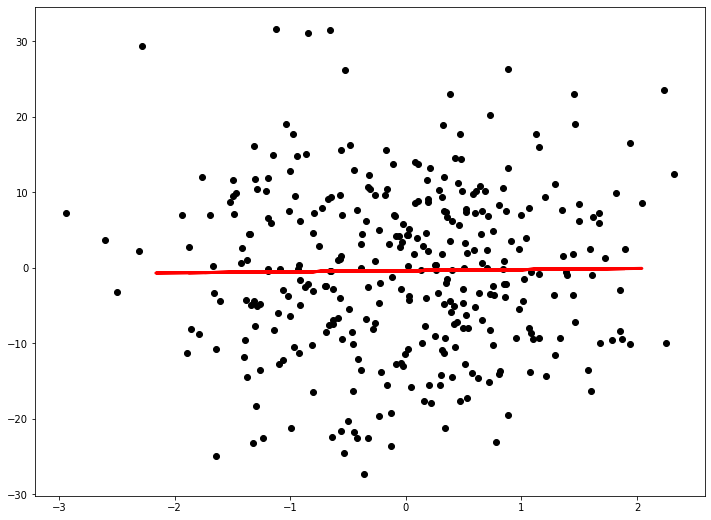

In [20]:
draw_dual_model(x_train[0], y_train, x_test[0], y_test)

Коэффициенты регрессии: [[-1.05602976]]
Среднеквадратичная ошибка: 123.93094833875892
Коэффициент детерминации: 0.021321166752692355


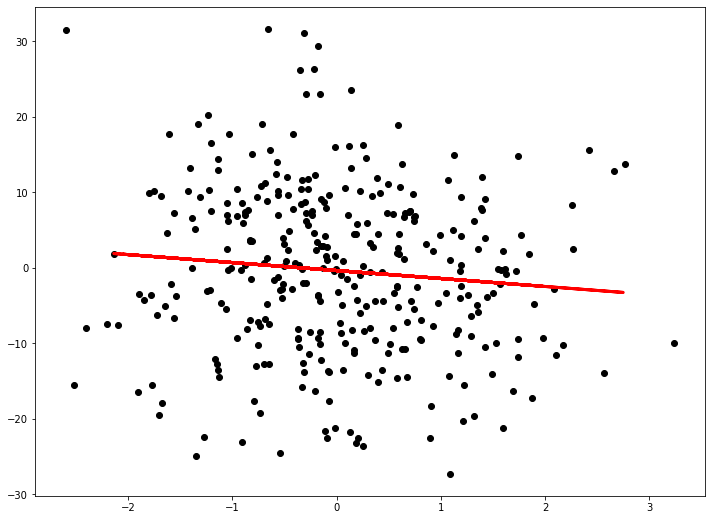

In [21]:
draw_dual_model(x_train[1], y_train, x_test[1], y_test)

Коэффициенты регрессии: [[4.04942933]]
Среднеквадратичная ошибка: 95.34770967246084
Коэффициент детерминации: 0.247042110902147


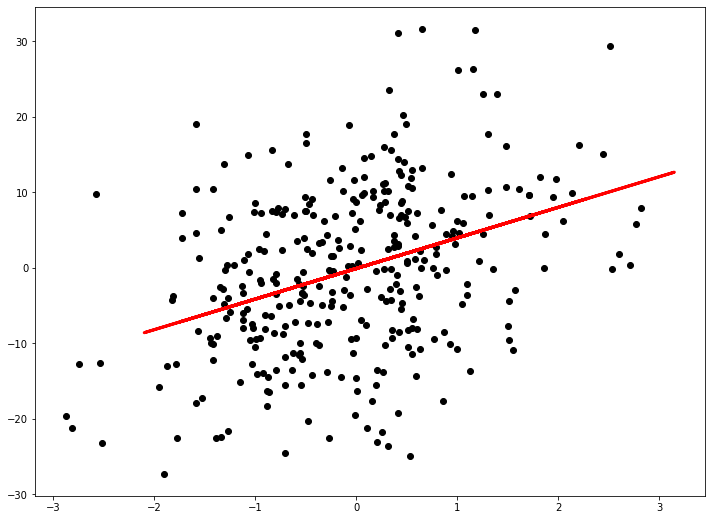

In [22]:
draw_dual_model(x_train[2], y_train, x_test[2], y_test)

Коэффициенты регрессии: [[0.91741617]]
Среднеквадратичная ошибка: 132.5628791505793
Коэффициент детерминации: -0.04684492161203124


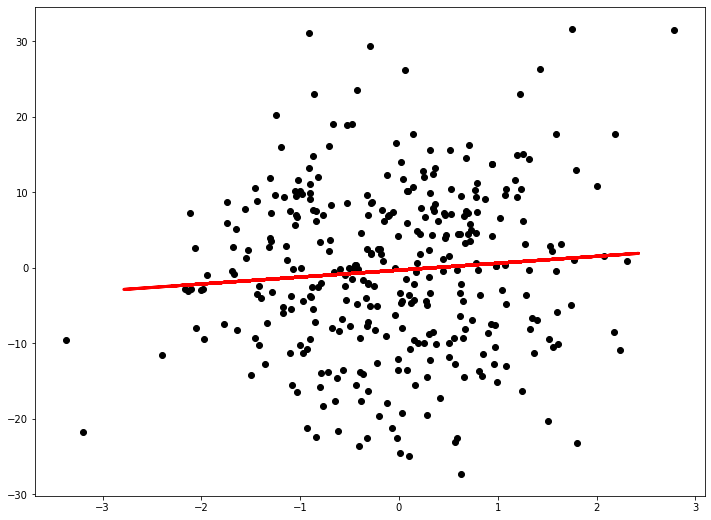

In [23]:
draw_dual_model(x_train[3], y_train, x_test[3], y_test)

Постройте модель множественной линейной регрессии целевой переменной от всех показателей. Оцените качество регрессии, сделайте вывод.

In [24]:
reg = linear_model.LinearRegression()
reg.fit(X, Y)
y_pred = reg.predict(X)

print("Коэффициенты:\n", "\n".join(["x"+str(i)+") " + str(item) for i, item in enumerate(reg.coef_[0])]), '\n', sep='')
print("Среднеквадратичная ошибка: %.2f" % mean_squared_error(Y, y_pred))
print("Коэффициент детерминации: %.2f" % r2_score(Y, y_pred))

Коэффициенты:
x0) 0.29010487252696066
x1) -0.754913977931472
x2) 4.305277665049431
x3) 0.15866973822607433
x4) -0.09451029432414515
x5) 0.23548825300578602
x6) 0.3251575555383057

Среднеквадратичная ошибка: 101.71
Коэффициент детерминации: 0.17


### **Коэфициент детерминации почит равен 0, значит модель хорошо обучена. Средневадратичная ошибка входит в норму.**